## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9606716	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9390920	total: 59.7ms	remaining: 19.8s
3:	learn: 0.9209237	total: 60.7ms	remaining: 15.1s
4:	learn: 0.9046978	total: 61.5ms	remaining: 12.2s
5:	learn: 0.8896854	total: 62.4ms	remaining: 10.3s
6:	learn: 0.8724151	total: 63.3ms	remaining: 8.97s
7:	learn: 0.8558633	total: 64.1ms	remaining: 7.95s
8:	learn: 0.8400199	total: 64.8ms	remaining: 7.13s
9:	learn: 0.8229065	total: 65.7ms	remaining: 6.5s
10:	learn: 0.8057776	total: 66.5ms	remaining: 5.98s
11:	learn: 0.7907426	total: 67.3ms	remaining: 5.54s
12:	learn: 0.7753485	total: 68.1ms	remaining: 5.17s
13:	learn: 0.7601130	total: 68.9ms	remaining: 4.86s
14:	learn: 0.7475256	total: 69.7ms	remaining: 4.58s
15:	learn: 0.7326054	total: 70.5ms	remaining: 4.33s
16:	learn: 0.7206853	total: 71.2ms	remaining: 4.12s
17:	learn: 0.7077303	total: 72ms	remaining: 3.93s
18:	learn: 0.6955287	total: 72.8ms	remaining: 3

110:	learn: 0.2932928	total: 150ms	remaining: 1.2s
111:	learn: 0.2916150	total: 151ms	remaining: 1.2s
112:	learn: 0.2903158	total: 152ms	remaining: 1.19s
113:	learn: 0.2893044	total: 153ms	remaining: 1.19s
114:	learn: 0.2880453	total: 154ms	remaining: 1.18s
115:	learn: 0.2868924	total: 155ms	remaining: 1.18s
116:	learn: 0.2854905	total: 156ms	remaining: 1.17s
117:	learn: 0.2838426	total: 156ms	remaining: 1.17s
118:	learn: 0.2827228	total: 157ms	remaining: 1.16s
119:	learn: 0.2820207	total: 158ms	remaining: 1.16s
120:	learn: 0.2807575	total: 159ms	remaining: 1.15s
121:	learn: 0.2800950	total: 160ms	remaining: 1.15s
122:	learn: 0.2793606	total: 160ms	remaining: 1.14s
123:	learn: 0.2786503	total: 161ms	remaining: 1.14s
124:	learn: 0.2775226	total: 162ms	remaining: 1.13s
125:	learn: 0.2762040	total: 163ms	remaining: 1.13s
126:	learn: 0.2750143	total: 164ms	remaining: 1.13s
127:	learn: 0.2739443	total: 165ms	remaining: 1.12s
128:	learn: 0.2729034	total: 166ms	remaining: 1.12s
129:	learn: 0.

159:	learn: 0.2461317	total: 192ms	remaining: 1.01s
160:	learn: 0.2456028	total: 193ms	remaining: 1.01s
161:	learn: 0.2449256	total: 194ms	remaining: 1s
162:	learn: 0.2444113	total: 195ms	remaining: 1000ms
163:	learn: 0.2438126	total: 196ms	remaining: 997ms
164:	learn: 0.2432080	total: 196ms	remaining: 994ms
165:	learn: 0.2425986	total: 197ms	remaining: 990ms
166:	learn: 0.2421108	total: 198ms	remaining: 988ms
167:	learn: 0.2413956	total: 199ms	remaining: 985ms
168:	learn: 0.2407630	total: 200ms	remaining: 983ms
169:	learn: 0.2401529	total: 201ms	remaining: 980ms
170:	learn: 0.2391465	total: 201ms	remaining: 977ms
171:	learn: 0.2383087	total: 202ms	remaining: 974ms
172:	learn: 0.2377594	total: 203ms	remaining: 971ms
173:	learn: 0.2373192	total: 204ms	remaining: 969ms
174:	learn: 0.2367045	total: 205ms	remaining: 966ms
175:	learn: 0.2361335	total: 206ms	remaining: 963ms
176:	learn: 0.2354892	total: 206ms	remaining: 960ms
177:	learn: 0.2349935	total: 207ms	remaining: 957ms
178:	learn: 0.

317:	learn: 0.1714053	total: 325ms	remaining: 697ms
318:	learn: 0.1709797	total: 326ms	remaining: 696ms
319:	learn: 0.1706233	total: 327ms	remaining: 694ms
320:	learn: 0.1703284	total: 328ms	remaining: 693ms
321:	learn: 0.1700544	total: 328ms	remaining: 691ms
322:	learn: 0.1696955	total: 329ms	remaining: 690ms
323:	learn: 0.1695203	total: 330ms	remaining: 689ms
324:	learn: 0.1693707	total: 331ms	remaining: 687ms
325:	learn: 0.1690932	total: 332ms	remaining: 686ms
326:	learn: 0.1687871	total: 332ms	remaining: 684ms
327:	learn: 0.1684932	total: 333ms	remaining: 683ms
328:	learn: 0.1680740	total: 334ms	remaining: 681ms
329:	learn: 0.1676495	total: 335ms	remaining: 680ms
330:	learn: 0.1672606	total: 336ms	remaining: 679ms
331:	learn: 0.1669891	total: 337ms	remaining: 677ms
332:	learn: 0.1666284	total: 337ms	remaining: 676ms
333:	learn: 0.1664670	total: 338ms	remaining: 674ms
334:	learn: 0.1660441	total: 339ms	remaining: 673ms
335:	learn: 0.1657088	total: 340ms	remaining: 672ms
336:	learn: 

365:	learn: 0.1576744	total: 366ms	remaining: 634ms
366:	learn: 0.1574980	total: 367ms	remaining: 633ms
367:	learn: 0.1573862	total: 368ms	remaining: 632ms
368:	learn: 0.1572274	total: 369ms	remaining: 631ms
369:	learn: 0.1568606	total: 370ms	remaining: 630ms
370:	learn: 0.1564609	total: 371ms	remaining: 628ms
371:	learn: 0.1560608	total: 372ms	remaining: 627ms
372:	learn: 0.1558547	total: 372ms	remaining: 626ms
373:	learn: 0.1555605	total: 373ms	remaining: 625ms
374:	learn: 0.1552292	total: 374ms	remaining: 623ms
375:	learn: 0.1549435	total: 375ms	remaining: 622ms
376:	learn: 0.1546544	total: 376ms	remaining: 621ms
377:	learn: 0.1543066	total: 376ms	remaining: 619ms
378:	learn: 0.1540311	total: 377ms	remaining: 618ms
379:	learn: 0.1536233	total: 378ms	remaining: 617ms
380:	learn: 0.1533239	total: 379ms	remaining: 615ms
381:	learn: 0.1530299	total: 380ms	remaining: 614ms
382:	learn: 0.1528336	total: 380ms	remaining: 613ms
383:	learn: 0.1526162	total: 381ms	remaining: 611ms
384:	learn: 

540:	learn: 0.1217415	total: 516ms	remaining: 438ms
541:	learn: 0.1214753	total: 517ms	remaining: 437ms
542:	learn: 0.1212860	total: 518ms	remaining: 436ms
543:	learn: 0.1211131	total: 518ms	remaining: 435ms
544:	learn: 0.1208536	total: 519ms	remaining: 433ms
545:	learn: 0.1207734	total: 520ms	remaining: 432ms
546:	learn: 0.1205887	total: 521ms	remaining: 431ms
547:	learn: 0.1203470	total: 522ms	remaining: 430ms
548:	learn: 0.1201638	total: 523ms	remaining: 429ms
549:	learn: 0.1200067	total: 524ms	remaining: 428ms
550:	learn: 0.1198272	total: 524ms	remaining: 427ms
551:	learn: 0.1195666	total: 525ms	remaining: 426ms
552:	learn: 0.1194183	total: 526ms	remaining: 425ms
553:	learn: 0.1191881	total: 527ms	remaining: 424ms
554:	learn: 0.1189026	total: 527ms	remaining: 423ms
555:	learn: 0.1187021	total: 528ms	remaining: 422ms
556:	learn: 0.1185118	total: 529ms	remaining: 421ms
557:	learn: 0.1183468	total: 530ms	remaining: 420ms
558:	learn: 0.1181768	total: 531ms	remaining: 419ms
559:	learn: 

571:	learn: 0.1161027	total: 541ms	remaining: 405ms
572:	learn: 0.1159918	total: 542ms	remaining: 404ms
573:	learn: 0.1157478	total: 543ms	remaining: 403ms
574:	learn: 0.1155859	total: 544ms	remaining: 402ms
575:	learn: 0.1154385	total: 545ms	remaining: 401ms
576:	learn: 0.1153858	total: 546ms	remaining: 400ms
577:	learn: 0.1153157	total: 547ms	remaining: 399ms
578:	learn: 0.1150992	total: 547ms	remaining: 398ms
579:	learn: 0.1147799	total: 548ms	remaining: 397ms
580:	learn: 0.1146177	total: 549ms	remaining: 396ms
581:	learn: 0.1144786	total: 550ms	remaining: 395ms
582:	learn: 0.1143718	total: 551ms	remaining: 394ms
583:	learn: 0.1142120	total: 552ms	remaining: 393ms
584:	learn: 0.1139755	total: 552ms	remaining: 392ms
585:	learn: 0.1137566	total: 553ms	remaining: 391ms
586:	learn: 0.1135706	total: 554ms	remaining: 390ms
587:	learn: 0.1134748	total: 555ms	remaining: 389ms
588:	learn: 0.1134371	total: 556ms	remaining: 388ms
589:	learn: 0.1131994	total: 557ms	remaining: 387ms
590:	learn: 

744:	learn: 0.0920264	total: 691ms	remaining: 237ms
745:	learn: 0.0918709	total: 692ms	remaining: 236ms
746:	learn: 0.0917286	total: 693ms	remaining: 235ms
747:	learn: 0.0916813	total: 694ms	remaining: 234ms
748:	learn: 0.0915730	total: 695ms	remaining: 233ms
749:	learn: 0.0915436	total: 695ms	remaining: 232ms
750:	learn: 0.0914450	total: 696ms	remaining: 231ms
751:	learn: 0.0912826	total: 697ms	remaining: 230ms
752:	learn: 0.0911103	total: 698ms	remaining: 229ms
753:	learn: 0.0909450	total: 699ms	remaining: 228ms
754:	learn: 0.0908138	total: 699ms	remaining: 227ms
755:	learn: 0.0907134	total: 700ms	remaining: 226ms
756:	learn: 0.0906398	total: 701ms	remaining: 225ms
757:	learn: 0.0905546	total: 702ms	remaining: 224ms
758:	learn: 0.0904137	total: 703ms	remaining: 223ms
759:	learn: 0.0903441	total: 703ms	remaining: 222ms
760:	learn: 0.0902583	total: 704ms	remaining: 221ms
761:	learn: 0.0901566	total: 705ms	remaining: 220ms
762:	learn: 0.0900882	total: 706ms	remaining: 219ms
763:	learn: 

790:	learn: 0.0866955	total: 732ms	remaining: 193ms
791:	learn: 0.0865584	total: 733ms	remaining: 193ms
792:	learn: 0.0864905	total: 734ms	remaining: 192ms
793:	learn: 0.0863819	total: 735ms	remaining: 191ms
794:	learn: 0.0863573	total: 735ms	remaining: 190ms
795:	learn: 0.0862351	total: 736ms	remaining: 189ms
796:	learn: 0.0861251	total: 737ms	remaining: 188ms
797:	learn: 0.0860579	total: 738ms	remaining: 187ms
798:	learn: 0.0860072	total: 739ms	remaining: 186ms
799:	learn: 0.0859006	total: 740ms	remaining: 185ms
800:	learn: 0.0858199	total: 741ms	remaining: 184ms
801:	learn: 0.0856808	total: 742ms	remaining: 183ms
802:	learn: 0.0855259	total: 742ms	remaining: 182ms
803:	learn: 0.0854329	total: 743ms	remaining: 181ms
804:	learn: 0.0853917	total: 744ms	remaining: 180ms
805:	learn: 0.0852416	total: 745ms	remaining: 179ms
806:	learn: 0.0851578	total: 746ms	remaining: 178ms
807:	learn: 0.0850396	total: 746ms	remaining: 177ms
808:	learn: 0.0848606	total: 747ms	remaining: 176ms
809:	learn: 

968:	learn: 0.0709569	total: 882ms	remaining: 28.2ms
969:	learn: 0.0708275	total: 883ms	remaining: 27.3ms
970:	learn: 0.0707121	total: 884ms	remaining: 26.4ms
971:	learn: 0.0706513	total: 885ms	remaining: 25.5ms
972:	learn: 0.0705804	total: 885ms	remaining: 24.6ms
973:	learn: 0.0705152	total: 886ms	remaining: 23.7ms
974:	learn: 0.0704742	total: 887ms	remaining: 22.7ms
975:	learn: 0.0704049	total: 888ms	remaining: 21.8ms
976:	learn: 0.0703682	total: 889ms	remaining: 20.9ms
977:	learn: 0.0703054	total: 890ms	remaining: 20ms
978:	learn: 0.0702458	total: 890ms	remaining: 19.1ms
979:	learn: 0.0702116	total: 891ms	remaining: 18.2ms
980:	learn: 0.0701088	total: 892ms	remaining: 17.3ms
981:	learn: 0.0700578	total: 893ms	remaining: 16.4ms
982:	learn: 0.0700271	total: 894ms	remaining: 15.5ms
983:	learn: 0.0699035	total: 894ms	remaining: 14.5ms
984:	learn: 0.0697808	total: 895ms	remaining: 13.6ms
985:	learn: 0.0696729	total: 896ms	remaining: 12.7ms
986:	learn: 0.0695978	total: 897ms	remaining: 11

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1125589748778194


#### Sanity Checks 

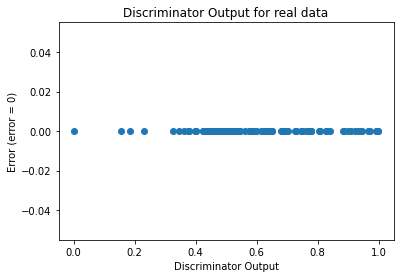

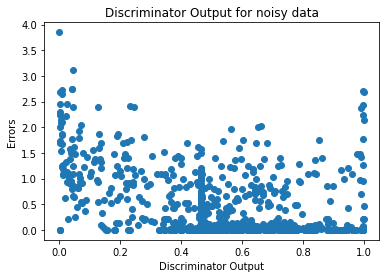

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 430


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.1225497913341633


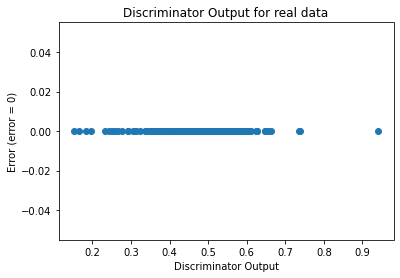

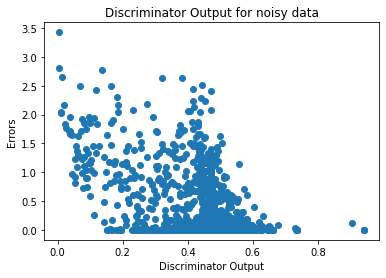

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11696785197968337


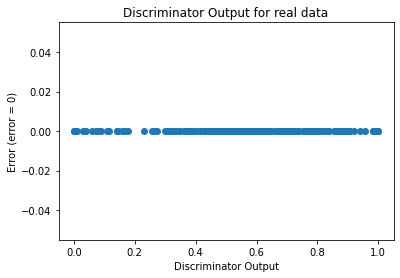

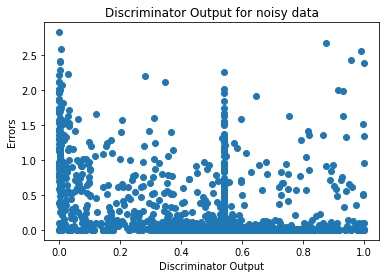

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7476]], requires_grad=True)
